<?xml version="1.0" encoding="UTF-8"?>
<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://www.uvv.br/wp-content/themes/uvvBr/templates/assets//img/logouvv.svg" alt="UVV-LOGO" style = width="100px"; height="100px">
        </CENTER>
        <CENTER><b>AN√ÅLISE DE DADOS</b></CENTER>
        <CENTER><b>AOP2 - ATIVIDADE ONLINE PONTUADA 2</b></CENTER><br/>

**NOME COMPLETO: Ot√°vio Theodoro de Bortoli Villela Santos** 

#ATIVIDADE ONLINE PONTUADA ‚Äì AOP2

**Link do Arquivo table.csv**: [Clique Aqui!](https://drive.google.com/file/d/1mT9HM6oirjvuXZkFTZRQyFWRebX3fS3B/view?usp=sharing)

# Carregar o Dataset (arquivo)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# importe outras bibliotecas que vc julgar necess√°rio.

In [9]:
table = pd.read_csv('table.csv', index_col = 0)

In [10]:
table.head()

C√ìDIGO    REGI√ÉO       SEXO PAGAMENTO  TOTAL (R$)
0    5151  SULDESTE  MASCULINO    D√âBITO     6872.16
1    6604       SUL   FEMININO   CR√âDITO     5219.01
2    6539  SULDESTE  MASCULINO    D√âBITO     9945.68
3    6922  SULDESTE   FEMININO   CR√âDITO     9993.06
4    4546  SULDESTE  MASCULINO   CR√âDITO     5536.25

# **A partir do Dataset: table.csv, conforme as colunas do enunciado:**

Resposta as seguintes quest√µes:

# **QUEST√ÉO a):**

Fa√ßa a an√°lise de Perfil de cliente por agrega√ß√£o: SEXO x PAGAMENTO x TOTAL (plot) e seu Box Plot.

Resumo por SEXO e PAGAMENTO:
        SEXO PAGAMENTO  Contagem        Media   Mediana         Soma  \
0   FEMININO   CR√âDITO       858  5144.498263  5123.735   4413979.51   
1   FEMININO    D√âBITO       324  5369.523519  5589.295   1739725.62   
2  MASCULINO   CR√âDITO      2795  5165.453317  5131.460  14437442.02   
3  MASCULINO    D√âBITO      1023  5226.743558  5322.010   5346958.66   

   Desvio_Padrao  
0    2994.000749  
1    2934.495817  
2    3012.914105  
3    3050.031112  


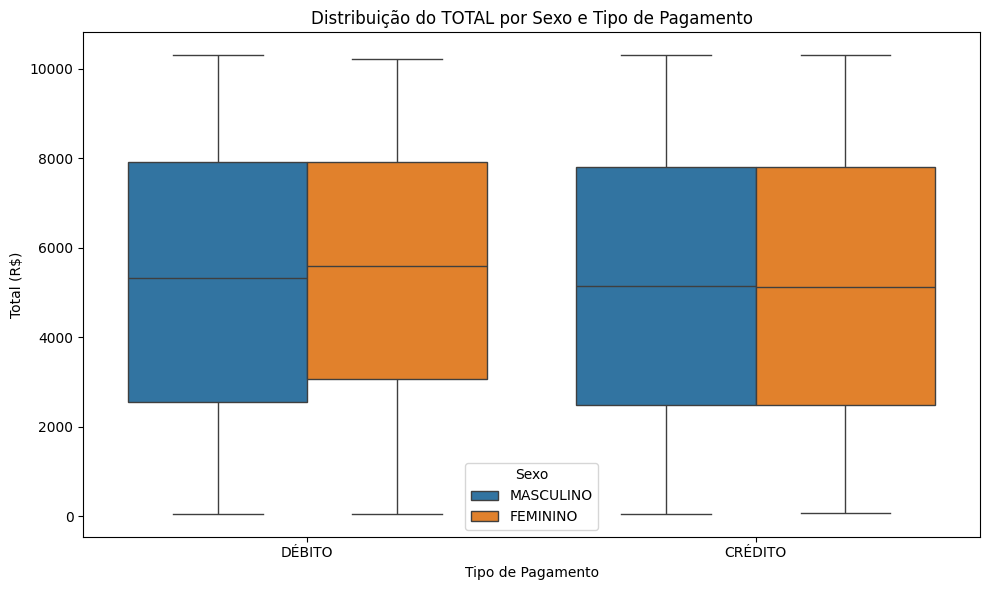

In [11]:
# 1. Renomear a coluna de total para facilitar o c√≥digo
table.rename(columns={'TOTAL (R$)': 'TOTAL'}, inplace=True)

# 2. Agregar os dados por SEXO e PAGAMENTO
agrupado = table.groupby(['SEXO', 'PAGAMENTO']).agg(
    Contagem=('TOTAL', 'count'),
    Media=('TOTAL', 'mean'),
    Mediana=('TOTAL', 'median'),
    Soma=('TOTAL', 'sum'),
    Desvio_Padrao=('TOTAL', 'std')
).reset_index()

# 3. Exibir o resumo estat√≠stico
print("Resumo por SEXO e PAGAMENTO:")
print(agrupado)

# 4. Criar boxplot da distribui√ß√£o do TOTAL
plt.figure(figsize=(10, 6))
sns.boxplot(x='PAGAMENTO', y='TOTAL', hue='SEXO', data=table)

plt.title('Distribui√ß√£o do TOTAL por Sexo e Tipo de Pagamento')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Total (R$)')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

# **QUEST√ÉO b):**

Fa√ßa a an√°lise de Perfil de cliente por agrega√ß√£o: REGI√ÉO x PAGAMENTO x TOTAL (plot) e seu Box Plot.

Resumo por REGI√ÉO e PAGAMENTO:
         REGI√ÉO PAGAMENTO  Contagem        Media   Mediana         Soma  \
0  CENTRO-OESTE   CR√âDITO       180  5379.152111  5348.790    968247.38   
1  CENTRO-OESTE    D√âBITO        62  4932.537097  4752.935    305817.30   
2      NORDESTE   CR√âDITO       116  5345.078448  5639.250    620029.10   
3      NORDESTE    D√âBITO        44  5633.982955  5863.275    247895.25   
4         NORTE   CR√âDITO        85  4575.308471  4315.700    388901.22   
5         NORTE    D√âBITO        26  5152.218462  5394.110    133957.68   
6           SUL   CR√âDITO       711  5079.154543  5053.180   3611278.88   
7           SUL    D√âBITO       280  5258.013893  5314.285   1472243.89   
8      SULDESTE   CR√âDITO      2561  5178.822706  5175.750  13262964.95   
9      SULDESTE    D√âBITO       935  5269.272898  5384.840   4926770.16   

   Desvio_Padrao  
0    2861.522746  
1    3075.908213  
2    3104.812837  
3    3277.175114  
4    2811.016667  
5    2911.557647 

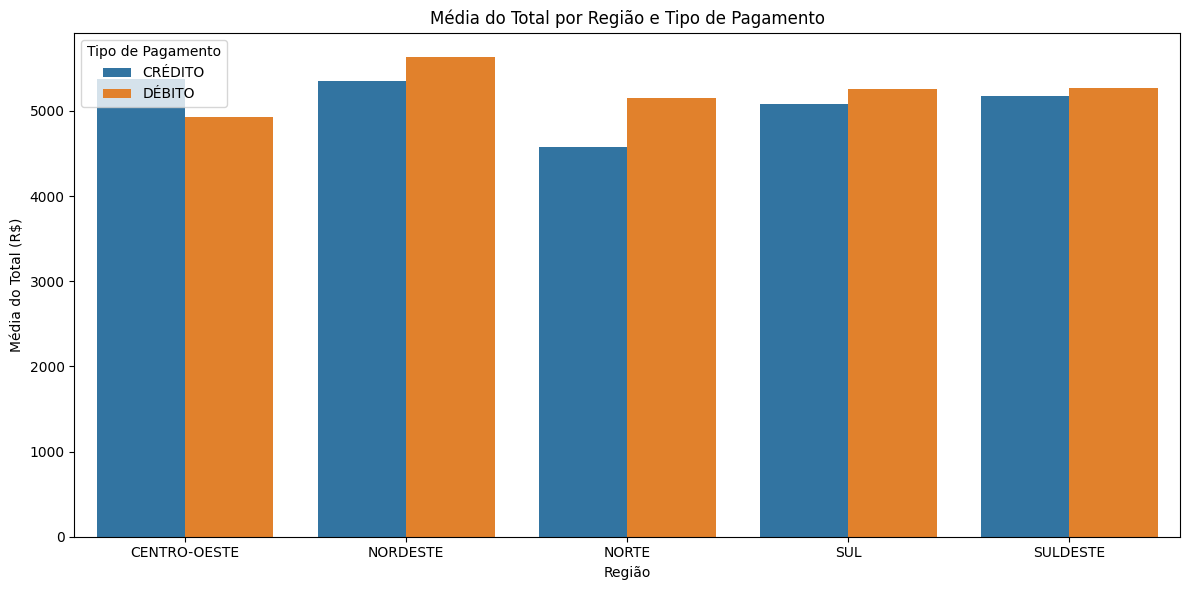

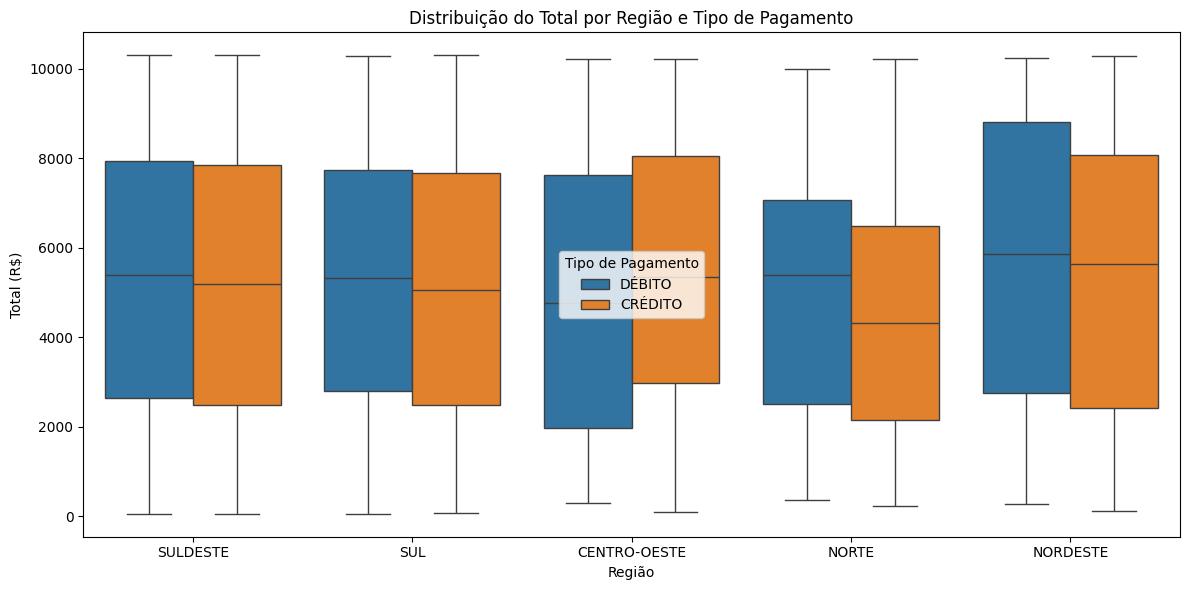

In [12]:
agrupado = table.groupby(['REGI√ÉO', 'PAGAMENTO']).agg(
    Contagem=('TOTAL', 'count'),
    Media=('TOTAL', 'mean'),
    Mediana=('TOTAL', 'median'),
    Soma=('TOTAL', 'sum'),
    Desvio_Padrao=('TOTAL', 'std')
).reset_index()

# 3. Exibir o resumo estat√≠stico
print("Resumo por REGI√ÉO e PAGAMENTO:")
print(agrupado)

# 4. Gr√°fico de barras da m√©dia de TOTAL por REGI√ÉO e PAGAMENTO
plt.figure(figsize=(12, 6))
sns.barplot(data=agrupado, x='REGI√ÉO', y='Media', hue='PAGAMENTO')
plt.title('M√©dia do Total por Regi√£o e Tipo de Pagamento')
plt.ylabel('M√©dia do Total (R$)')
plt.xlabel('Regi√£o')
plt.legend(title='Tipo de Pagamento')
plt.tight_layout()
plt.show()

# 5. Boxplot da distribui√ß√£o do TOTAL por REGI√ÉO e PAGAMENTO
plt.figure(figsize=(12, 6))
sns.boxplot(data=table, x='REGI√ÉO', y='TOTAL', hue='PAGAMENTO')
plt.title('Distribui√ß√£o do Total por Regi√£o e Tipo de Pagamento')
plt.ylabel('Total (R$)')
plt.xlabel('Regi√£o')
plt.legend(title='Tipo de Pagamento')
plt.tight_layout()
plt.show()

# **QUEST√ÉO c):**

Fa√ßa a an√°lise estat√≠stica, com o info e o describe, sobre os dados dos clientes.

In [13]:
# 1. Ver informa√ß√µes gerais sobre o DataFrame
print("üìã Informa√ß√µes da base de dados:")
table.info()

print("\nüìä Estat√≠sticas descritivas:")
# 2. Ver estat√≠sticas descritivas da base
print(table.describe())

üìã Informa√ß√µes da base de dados:
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   C√ìDIGO     5000 non-null   int64  
 1   REGI√ÉO     5000 non-null   object 
 2   SEXO       5000 non-null   object 
 3   PAGAMENTO  5000 non-null   object 
 4   TOTAL      5000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 234.4+ KB

üìä Estat√≠sticas descritivas:
            C√ìDIGO         TOTAL
count  5000.000000   5000.000000
mean   5488.152600   5187.621162
std    2590.132201   3011.918179
min    1001.000000     52.530000
25%    3260.750000   2517.320000
50%    5499.000000   5198.410000
75%    7707.250000   7825.682500
max    9998.000000  10295.880000


# **QUEST√ÉO d):**

Enumere 3 caracter√≠sticas inferidas encontradas a partir dos resultados estat√≠sticos obtidos nos itens a), b) e c):

1.   Caracter√≠stica 1:
A base de dados est√° completa e sem valores ausentes, o que garante confiabilidade nas an√°lises. Todos os 5.000 registros t√™m informa√ß√µes preenchidas em todas as colunas.

2.   Caracter√≠stica 2:
Os valores da coluna TOTAL possuem alta variabilidade, com um desvio padr√£o de aproximadamente R$ 3.011, o que indica grande diferen√ßa entre os gastos dos clientes ‚Äî h√° desde valores muito baixos (~R$ 52) at√© gastos acima de R$ 10.000.

3.   Caracter√≠stica 3: 
A distribui√ß√£o de gastos varia entre regi√µes e formas de pagamento, conforme os boxplots mostraram. Por exemplo, certas regi√µes apresentam maior concentra√ß√£o de gastos altos com um tipo espec√≠fico de pagamento (como cart√£o de cr√©dito), sugerindo perfis de consumo distintos por localiza√ß√£o geogr√°fica.

# **OBSERVA√á√ÉO IMPORTANTE:**

**PARA ENTREGAR A ATIVIDADE:**

OBRIGAT√ìRIO: Fa√ßa a impress√£o do seu **Notebook Colab (.ipynb) no formato PDF (Acrobat): .PDF** e fa√ßa o upload no AVA: AOP2.pdf.

#CONVERTER IPYNB para PDF

PASSO A PASSO:

1.   Fazer o download do seu IPYNB.
2.   Fazer o upload do seu IPYNB para √°rea tempor√°ria: content.
3.   Rodar o c√≥digo abaixo com seu NOME_DO_COLAB.ipynb: Gerar um HTML.
4.   Fazer o download do seu HTML e abrir em um Browser qualquer.
3.   Imprimir a p√°gina HTML em PDF. Pronto (UFA)::: üòÖ!

In [14]:
%%shell
jupyter nbconvert --to html /content/NOME_DO_COLAB.ipynb

UsageError: Cell magic `%%shell` not found.


**N√ÉO ENVIAR O ARQUIVO COLAB: .IPYNB**

**FA√áA AQUI UM LINK PARA O PROFESSOR** (COMPARTILHADO COM TODOS): [https://1drv.ms/u/c/43eebf60cebf2fdb/EbUfD5zBYvFGtxAqcnb91BIBN_564Q6uTWPiYtsKyTj_rg?e=w0pXwh]